In [1]:
import sys
!{sys.executable} -m pip install -q ipywidgets widgetsnbextension
sys.path.append("../")

In [2]:
import matplotlib.pyplot as plt
import torch

%matplotlib inline

In [3]:
from collections import namedtuple
from utils.config_parser import ConfigParser
from train import Trainer

In [4]:
Flags = namedtuple("Flags", ["hyps", "opts"])

In [5]:
FLAGS = Flags("../configs/hyps.json", "../configs/nb_opts.json")

In [6]:
hyps, opts = ConfigParser.parse_configs(FLAGS.hyps, FLAGS.opts)
trainer = Trainer(opts, hyps)

Epoch: 1/6 | Training loss: 0.016195282330115635 | Validation Loss: 0.034091865168289937
Epoch: 2/6 | Training loss: 0.00729020627339681 | Validation Loss: 0.02431854225219564
Epoch: 3/6 | Training loss: 0.005420842058956623 | Validation Loss: 0.01941490142626014
Epoch: 4/6 | Training loss: 0.004504073905448119 | Validation Loss: 0.016468865370893097
Epoch: 5/6 | Training loss: 0.003865919567644596 | Validation Loss: 0.014365348796498902
Epoch: 6/6 | Training loss: 0.0033831156293551126 | Validation Loss: 0.012669780836539699


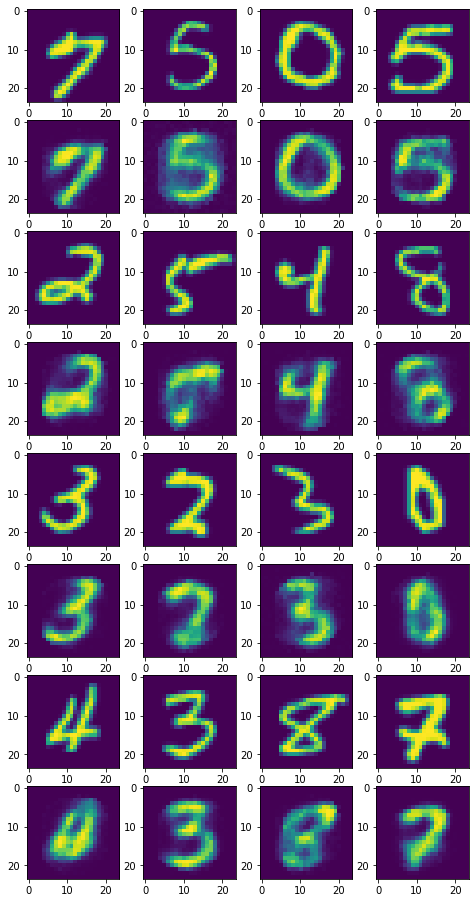

In [7]:
trainer.setup()
trainer.run()

In [8]:
og, _ = next(iter(trainer.val_loader))

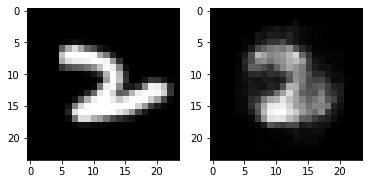

In [9]:
with torch.no_grad():
    plt.subplot(1, 2, 1)
    plt.imshow(og[0].squeeze(), cmap="gray")
    img = og.to(trainer.device)
    encoded, recon = trainer.model.network(img)
    plt.subplot(1, 2, 2)
    plt.imshow(recon.cpu().detach()[0].squeeze(), cmap="gray")


In [35]:
first_fc_layer = list(trainer.model.network.encoder.children())[1].weight.cpu().detach()

In [42]:
first_fc_layer.view(-1, 24, 24).shape

torch.Size([128, 24, 24])

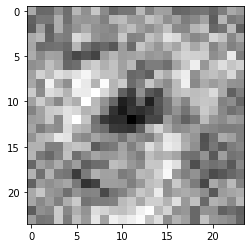

In [48]:

plt.imshow(first_fc_layer.view(-1, 24, 24)[3], cmap='gray');